# Polynomial regression

多項式回帰モデル

$$y=\sum_{i=0}^{n}\beta_ix^i$$

* $y$ は、出力変数=従属変数=目的変数
* $x$ は、入力変数=独立変数=説明変数
* $\beta$ は、パラメータ

前節の線形回帰モデルは、直線近似可能なデータに適用できるが、
そうでないデータに対して、多項式で近似することによって、うまく回帰できることがある。

線形回帰に比べてモデルが複雑なため、過学習に対しても注意が必要である。

ここでは、先ず線形回帰モデルを用いた学習をしたのち、多項式回帰モデルを用いた学習をし、両者を比較する。

In [1]:
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
RANGE = 5
x = np.random.rand(100) * RANGE
y = np.sin(x) + np.random.rand(100) * 0.3

In [3]:
x = x.reshape(-1, 1)
regressor = linear_model.LinearRegression()
regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
x_test = np.linspace(0, RANGE, 100).reshape(-1, 1)
y_pred = regressor.predict(x_test)

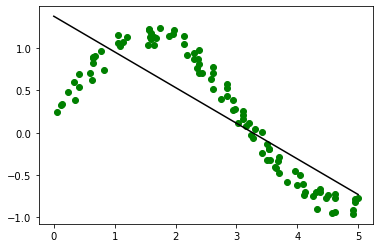

In [5]:
plt.scatter(x, y, c='green')
plt.plot(x_test, y_pred, color='black')
plt.show()

In [6]:
y_pred = regressor.predict(x)

In [7]:
print('** Liner regressor performance **')
print('Mean absolute error = ', round(sm.mean_absolute_error(y, y_pred), 2))
print('Mean squared error = ', round(sm.mean_squared_error(y, y_pred), 2))
print('Median absolute error = ', round(sm.median_absolute_error(y, y_pred), 2))
print('Explain variance score = ', round(sm.explained_variance_score(y, y_pred), 2))
print('R2 score = ', round(sm.r2_score(y, y_pred), 2))

** Liner regressor performance **
Mean absolute error =  0.33
Mean squared error =  0.16
Median absolute error =  0.27
Explain variance score =  0.68
R2 score =  0.68


このように、線形回帰モデルで学習した場合、予測が大きく外れる場合がある。

では、多項式回帰モデルを用いる。

In [8]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=10)
x_transformed = polynomial.fit_transform(x)
poly_regressor = linear_model.LinearRegression()
poly_regressor.fit(x_transformed, y)

x_test_transformed = polynomial.transform(x_test)
y_pred = poly_regressor.predict(x_test_transformed)

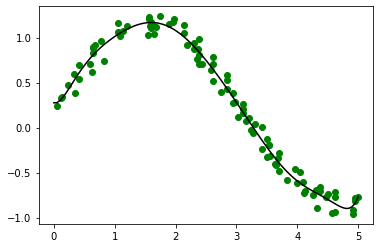

In [9]:
plt.scatter(x, y, c='green')
plt.plot(x_test, y_pred, color='black')
plt.show()

In [10]:
y_pred = poly_regressor.predict(x_transformed)

In [11]:
print('** Liner regressor performance **')
print('Mean absolute error = ', round(sm.mean_absolute_error(y, y_pred), 2))
print('Mean squared error = ', round(sm.mean_squared_error(y, y_pred), 2))
print('Median absolute error = ', round(sm.median_absolute_error(y, y_pred), 2))
print('Explain variance score = ', round(sm.explained_variance_score(y, y_pred), 2))
print('R2 score = ', round(sm.r2_score(y, y_pred), 2))

** Liner regressor performance **
Mean absolute error =  0.07
Mean squared error =  0.01
Median absolute error =  0.06
Explain variance score =  0.99
R2 score =  0.99


このように、より柔軟な近似が可能になる(とはいえ上記の例は過学習ではないだろうか)。

`degree`は多項式の次数を表す。

In [12]:
polynomial = PolynomialFeatures(degree=2)
x_transformed = polynomial.fit_transform(x)
poly_regressor = linear_model.LinearRegression()
poly_regressor.fit(x_transformed, y)

x_test_transformed = polynomial.transform(x_test)
y_pred = poly_regressor.predict(x_test_transformed)

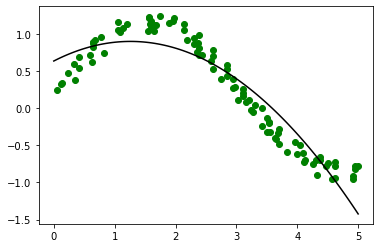

In [13]:
plt.scatter(x, y, c='green')
plt.plot(x_test, y_pred, color='black')
plt.show()

In [14]:
y_pred = poly_regressor.predict(x_transformed)

In [15]:
print('** Liner regressor performance **')
print('Mean absolute error = ', round(sm.mean_absolute_error(y, y_pred), 2))
print('Mean squared error = ', round(sm.mean_squared_error(y, y_pred), 2))
print('Median absolute error = ', round(sm.median_absolute_error(y, y_pred), 2))
print('Explain variance score = ', round(sm.explained_variance_score(y, y_pred), 2))
print('R2 score = ', round(sm.r2_score(y, y_pred), 2))


** Liner regressor performance **
Mean absolute error =  0.21
Mean squared error =  0.06
Median absolute error =  0.19
Explain variance score =  0.88
R2 score =  0.88
